In [25]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [27]:
df=df[['v1','v2']]
df=df.rename(columns={'v1':'Label','v2':'message'})
df.head()

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df['Label']=df['Label'].map({'spam':0,'ham':1})

In [29]:
df.head()

,Label,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
X=df['message']
y=df['Label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
vectorizer=CountVectorizer()
X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)

In [32]:
model=MultinomialNB()
model.fit(X_train_vec,y_train)

MultinomialNB()

In [33]:
y_pred=model.predict(X_test_vec)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["ham","spam"]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Performance:
Accuracy: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.89      0.94       150
        spam       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[134  16]
 [  2 963]]


In [35]:
new_messages=[
    "Congratulations! You've won a free lottery ticket. Claim now!",
    "Hey, are we still meeting for lunch today?"
]

In [36]:
X_new=vectorizer.transform(new_messages)
new_preds=model.predict(X_new)
label_map={0:"spam",1:"ham"}
print("\nPredictions on test data")
for i in range(len(new_messages)):
    print("Message:",new_messages[i])
    print("Prediction:",label_map[new_preds[i]])
    print()


Predictions on test data
Message: Congratulations! You've won a free lottery ticket. Claim now!
Prediction: spam

Message: Hey, are we still meeting for lunch today?
Prediction: ham



In [37]:
df.Label.value_counts()

Label
1    4825
0     747
Name: count, dtype: int64

In [38]:
prior_pb=df['Label'].value_counts(normalize=True)

In [39]:
print(prior_pb)

Label
1    0.865937
0    0.134063
Name: proportion, dtype: float64


<Axes: xlabel='Label', ylabel='count'>

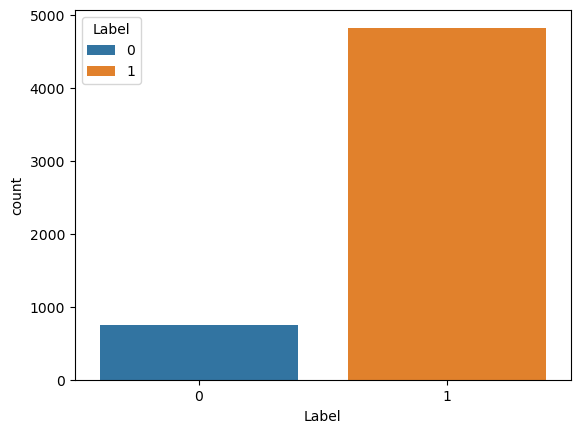

In [40]:
import seaborn as sns
sns.countplot(x='Label',data=df,hue='Label')
##Where 0 is spam and 1 is ham

In [41]:
new_messages = [
    "Congratulations! You've won a free lottery ticket. Claim now!",
    "Hey, are we still meeting for lunch today?",
]
X_new = vectorizer.transform(new_messages)
new_probs = model.predict_proba(X_new)
label_map = {0: "spam", 1: "ham"}
for msg, prob, pred in zip(new_messages, new_probs, new_preds):
    predicted_label = label_map[pred]
    print(f"Message: {msg}")
    print(f"P(spam)={prob[0]:.4f}, P(ham)={prob[1]:.4f}, Prediction={predicted_label}")
    print()

Message: Congratulations! You've won a free lottery ticket. Claim now!
P(spam)=0.9999, P(ham)=0.0001, Prediction=spam

Message: Hey, are we still meeting for lunch today?
P(spam)=0.0000, P(ham)=1.0000, Prediction=ham



In [42]:
##pickle model
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(model,f)

In [43]:
with open('vectorizer.pkl','wb') as f:
    pickle.dump(vectorizer,f)